# PIL -> get_characters

## Pre-processing

In [1]:
import os, json
from PIL import Image, ImageDraw, ImageFont,ImageFilter
import PIL.Image
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Example of calling the function: get_glyph_img("上","STHeiti Medium.ttc",pt = 28)
# Return: numpy.ndarray
def get_glyph_img(character, fontname,
    pt = 1024, binarize = True,
    descent_offset = True, offset=0):
    """Get image of a certain glyph from the given font
    Parameters
    ----------
    character: str
        The character to draw
    pt: int
        Number of pixels horizontally and vertically
    binarize: boolean
        Return a binary image or not
    fontname: str
        The font file name
    
    Returns
    ----------
    glyph_img: numpy.ndarray
        A greyscale image of the glyph, with its foreground in white (255) and
        background in black (0). 
    """
    width = height = pt
    font = ImageFont.truetype(fontname, pt)  # the size of the char is pt
    
    _, descent = font.getmetrics()
#     start = -descent+offset if descent_offset else 0
    start = offset if descent_offset else 0
    img = PIL.Image.new('L', (pt, pt), 0)
    draw = ImageDraw.Draw(img)
    draw.text((0, start), character, 255, font = font)
    img_array = np.array(img, dtype = np.uint8)
    if not binarize: return img_array
    else: return (img_array > 128).astype(np.uint8)
    
#     ascent, descent = font.getmetrics()
#     (font_width, font_height), (offset_x, offset_y) = font.font.getsize(character)
#     img = Image.new('L', (width, height), 0)   # set up the background with size pt*pt
#     draw = ImageDraw.Draw(img)
#     draw.text((width/2-(font_width/2+offset_x),height/2-(font_height/2+offset_y)) ,character, fill=255,font=font)
# #     draw.text(((width-font_width)/2-offset_x/2, (height-font_height)/2-offset_y/2-descent/2), character, fill=255,font=font) # draw character
#     img.show()
#     return img

In [3]:
def descent_offset(pt, fontname,characters):
    res = np.zeros(len(characters))
    width = height = pt
    font = ImageFont.truetype(fontname, pt)  # the size of the char is pt
    for i in range (len(characters)):
        (font_width, font_height), (offset_x, offset_y) = font.font.getsize(characters[i])
        res[i] = height/2-(font_height/2+offset_y)
    
    return np.mean(res)

In [4]:
sentence = ''
for line in open('./common-standard-chinese-characters-table-master/level-1.txt','r'):
    rs = line.replace('\n','')
    sentence =sentence + rs
for line in open('./common-standard-chinese-characters-table-master/level-2.txt','r'):
    rs = line.replace('\n','')
    sentence =sentence + rs

print('The length of the sentence is {}'.format(len(sentence)))

The length of the sentence is 6500


In [5]:
def npz_char(pt = 28, fontname1 = "Songti.ttc", fontname2 = "STHeiti Medium.ttc"):
    global sentence
    sentence_train = sentence
    print('The length of the sentence_train is {}'.format(len(sentence_train)))
    
    sentence_train = list(sentence_train)
    # delete same elements in the list
    dic_train={}
    characters_train = list(dic_train.fromkeys(sentence_train).keys())
    # Determine descent_offset for both fonts 
    offset1 = descent_offset(pt,fontname1,characters_train)
    print("For {}, the offset is {}".format(fontname1,offset1))
    offset2 = descent_offset(pt,fontname2,characters_train)
    print("For {}, the offset is {}".format(fontname2,offset2))
    # Training set #
    num_chars_train = len(characters_train)
    font1_chars_train = np.zeros((num_chars_train, pt*pt),dtype = np.uint8)  # (num_chars, 784)
    font2_chars_train = np.zeros((num_chars_train, pt*pt),dtype = np.uint8)  # (num_chars, 784)
    
    for i in range(num_chars_train):
        font1_chars_train[i] = get_glyph_img(characters_train[i], fontname1, pt = pt, binarize = True, offset = offset1).flatten()
        font2_chars_train[i] = get_glyph_img(characters_train[i], fontname2, pt = pt, binarize = True, offset = offset2).flatten()
    # Valid set #
    idx = np.random.choice(range(2000), size =len(sentence_train)//5, replace=False)
    print(idx)
    sentence_valid = list(sentence[i] for i in idx)
    print('The length of the sentence_valid is {}'.format(len(sentence_valid)))
    sentence_valid = ''.join(sentence_valid)
    print(sentence_valid)
    sentence_valid = list(sentence_valid)
    dic_valid={}
    characters_valid = list(dic_valid.fromkeys(sentence_valid).keys()) # delete same elements in the list
    num_chars_valid = len(characters_valid)
    font1_chars_valid = np.zeros((num_chars_valid, pt*pt),dtype = np.uint8)  # (num_chars, 784)
    font2_chars_valid = np.zeros((num_chars_valid, pt*pt),dtype = np.uint8)  # (num_chars, 784)
    
    for i in range(num_chars_valid):
        # .flatten 28*28->784
        font1_chars_valid[i] = get_glyph_img(characters_valid[i], fontname1, pt = pt, binarize = True, offset = offset1).flatten()
        font2_chars_valid[i] = get_glyph_img(characters_valid[i], fontname2, pt = pt, binarize = True, offset = offset2).flatten()
    # Testing set
    # Not used until now
    
    # Save the data
    np.savez('/Users/Giatti/Desktop/AI篆刻/ImageMoments/data.npz', \
             X_train = font1_chars_train, y_train = font2_chars_train, \
             X_valid = font1_chars_valid, y_valid = font2_chars_valid)
    return

In [6]:
npz_char(pt = 28, fontname1 = "Songti.ttc", fontname2 = "STHeiti Medium.ttc")

The length of the sentence_train is 6500
For Songti.ttc, the offset is -5.9183076923076925
For STHeiti Medium.ttc, the offset is -1.2127692307692308
[ 419 1443  275 ... 1562 1971 1258]
The length of the sentence_valid is 1300
吁威仔埃砂尘壳刑洞垂拔参钞特归径泄灶冬竹完咨健阳斤弃农说或冷咒挚送行佣纷神驮胞仙芥茄要芳耍诫唧误奶配玫扒鬼虎胶纤迫甘妃十刺尬倚屯曰免无又执投苗来电都卖致卤栓物挺杯氢购紧巧叩哺建邪玻波呻昏弯闰帜囤吮今秤技思申垃定荷闪浇抚坊秀间泉素劳沪玩尼状毒迂盹莹八首值驴胜里沥示及万诵日种亩具迟左俏软妮拼比狱旦业主沟伴奏拄壬战狠贬更咏抹豺脆秦损纬反籽袁入右钳哗垦栖乎舰窃队秉饥钉不屉泽刃加方刀柿光咕侨刻贱举拙卜扰挡拨俭诚亢侍函庙戎朵咪姑附茬秃差芬芦哎杆岁回诞染治驹与夸代兔孩此讯哇肝什奸叨共疟步乃挟洼牵辽屈荡兹桔从骂气妥界勿泰注译坯士出泼拍帖论挽倡迪阶异荫造亚巴奔禾挪拽扑乞捣巾眨斩没泻纯除因皆坡苛话伯岭乱拯和岩钮羽肃幼死卸侥桂勉埋饮炫吓饺杉占炮月乘决秒肥聂柳枣杀囚吨捞衣玉灾怨乙汉犯血食茎构若蚂芹龙前娃蚌省岖阿迁唉庆凭启绚衬仿浅侠卵钙积讼帘辱坪钱抽客缸走违铃条夯哉珠剔应专束县袄经呆莲莺组虾用拂公们犹件川民到防羊恤笔韧刚侣采追扫阴医艰芋北有孟晃侈中迅趴帝拘壶莱炊抢年了舍乏哆众母宛夷文住泪乒迹丙矩垮顶息凤成也怡旭树冶节脏罗苦丧线院细现咧帕挫卉氧合亏鸭吱朽拱拗胰六哥济坷层势贴驳烈倘妒力田股础挖仇速驱拭卯索动供待闯氛将觉歼桌阵坑芭斥牺括革押良录哩唁连私恐胸俩怠咱顽豆俯开宋杭青恶所爸贵名互舌栽达迷倦闽侄砌歪匠吊孔克妙卡册响败危栅妇厘己绊钥爱佃俊贾挨疯义场研档言顾丽荣厕垒昨给洗议转透玛疙戒扳武闲麦沮忙鸣点尸机肋仍逐坎柬抡纠企退古苹爹拒元韭吐烁徊测拥纫扔卧叔邻求旨尝背创派予面东付勾迭借隶识吹茅耕却户捎巷叽侮发党柴吞徐脂灯字号狂扎帚审炸货妈吠闷玄俄型一诈色怯挤典沉纲林狰英姜化兴次片庚修酉圆脐凶放逝牧须云练划过吾罢台肾曲栏春丘吴虽绎乌扣贪振恬乐恢斗制止坠当尤弦厌奉逊凯荒水纹丑久乳污穿抓峦庭唠怎戈肤码屿匹耳狭孕饱班会芙心倔吧区监原勃持珍导哟训冈峰哪呐陡斧怒历挥初村拉

In [15]:
data = np.load('/Users/Giatti/Desktop/AI篆刻/ImageMoments/data.npz')

define the pt = 28


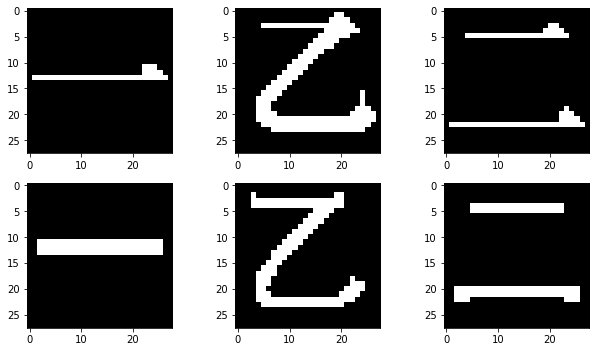

In [16]:
pt = 28
print("define the pt = {}".format(pt))
plt.figure(figsize=(9, 5)) 
# idx = np.random.choice(np.arange(6600))
plt.subplot(231); plt.imshow(data['X_train'][0].reshape(pt,pt),"gray" )
plt.subplot(234); plt.imshow(data['y_train'][0].reshape(pt,pt),"gray" )

plt.subplot(232); plt.imshow(data['X_train'][1].reshape(pt,pt),"gray" )
plt.subplot(235); plt.imshow(data['y_train'][1].reshape(pt,pt),"gray" )

plt.subplot(233); plt.imshow(data['X_train'][2].reshape(pt,pt),"gray" )
plt.subplot(236); plt.imshow(data['y_train'][2].reshape(pt,pt),"gray" )
plt.tight_layout()
plt.show()

# Pre-processing Finished -> AE_CNN

### Import and Pre-process the Data (data.nzp file with {'X_train': _____ , 'y_train': _____ , 'X_valid': _____ , 'y_valid': _____ })

In [17]:
from __future__ import division, print_function
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image, display, clear_output
%matplotlib nbagg
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sklearn.datasets
import tensorflow as tf
from tensorflow.python.framework.ops import reset_default_graph
import tensorflow as tf
tf.__version__

'1.14.0'

In [18]:
data = np.load('/Users/Giatti/Desktop/AI篆刻/ImageMoments/data.npz')
print('Shape of train_A:', data['X_train'].shape) # there are 34 Songti characters for training, with shape (34,784)
print('Shape of train_B:', data['y_train'].shape) # there are 34 STHeiti Medium for training, with shape (34,784)

# print(data['X_train'][0])
train_A = data['X_train'].astype("int8")
train_B = data['y_train'].astype("int8")
train_A, train_B = shuffle(train_A, train_B, random_state = 1234) #

valid_A = data['X_valid'].astype("int8")
valid_B = data['y_valid'].astype("int8")
valid_A, valid_B = shuffle(valid_A, valid_B, random_state = 1234)
print('Shape of train_A and train_B:', train_A.shape)
print('Shape of valid_A and valid_B:', valid_A.shape)

Shape of train_A: (6500, 784)
Shape of train_B: (6500, 784)
Shape of train_A and train_B: (6500, 784)
Shape of valid_A and valid_B: (1300, 784)


### Building the model

In [19]:
from tensorflow.contrib.layers import fully_connected
from tensorflow.python.ops.nn import relu, sigmoid

In [20]:
# define in/output size
num_features = train_A.shape[1]

# reset graph
reset_default_graph()

# define the model
A = tf.placeholder(tf.float32, [None, num_features], 'A')
B = tf.placeholder(tf.float32, [None, num_features], 'B')
l_enc = fully_connected(inputs=A, num_outputs=128, activation_fn=relu, scope='l_enc')
l_z = fully_connected(inputs=l_enc, num_outputs=2, activation_fn=None, scope='l_z') # None indicates a linear output.
l_dec = fully_connected(inputs=l_z, num_outputs=128, activation_fn=relu, scope='l_dec')
A_hat = fully_connected(inputs=l_dec, num_outputs=num_features, activation_fn=sigmoid) # iid pixel intensities between 0 and 1.

# calculate loss
# loss_per_pixel = tf.square(tf.subtract(A_hat, B))
loss_per_pixel = tf.square(tf.subtract(A_hat,  B))
loss = tf.reduce_mean(loss_per_pixel, name="mean_square_error")

# define our optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.25)

# make training op for applying the gradients
train_op = optimizer.minimize(loss)

Following we define the TensorFlow functions for training and evaluation.

In [21]:
# test the forward pass
_A_test = np.zeros(shape=(32, num_features))
_B_targets = np.zeros(shape=(32, num_features))
# initialize the Session
sess = tf.Session()
# test the forward pass
sess.run(tf.initialize_all_variables())
feed_dict = {A: _A_test, B: _B_targets}
res_forward_pass = sess.run(fetches=[A_hat, loss], feed_dict=feed_dict)
print("A_hat", res_forward_pass[0].shape)
print(loss)

A_hat (32, 784)
Tensor("mean_square_error:0", shape=(), dtype=float32)


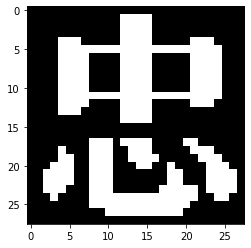

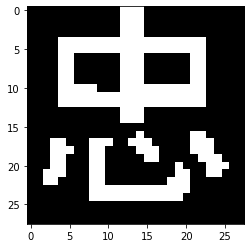

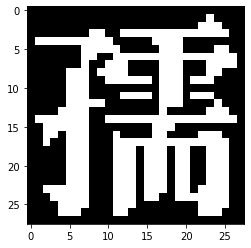

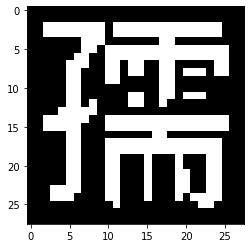

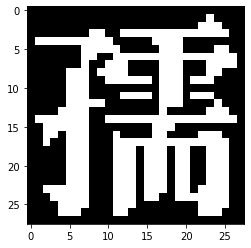

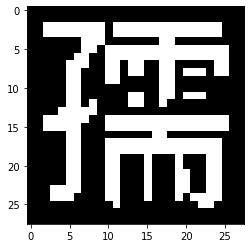

In [14]:
# # testing1 
valid_A[:] = train_A[3]
valid_B[:] = train_B[3]
plt.imshow(valid_A[0].reshape(28,28),cmap='gray')
plt.show()
plt.imshow(valid_B[0].reshape(28,28),cmap='gray')
plt.show()

k=5
size = train_A.shape[0]//k
train_A[size*k:]= train_A[k-1] 
train_B[size*k:]= train_B[k-1] 
for i in range (k-1,0,-1):
    train_A[size*(i-1): size*i] = train_A[i-1]
    train_B[size*(i-1): size*i] = train_B[i-1]
    

plt.imshow(train_A[0].reshape(28,28),cmap='gray')
plt.show()
plt.imshow(train_B[0].reshape(28,28),cmap='gray')
plt.show()
plt.imshow(train_A[102].reshape(28,28),cmap='gray')
plt.show()
plt.imshow(train_B[102].reshape(28,28),cmap='gray')
plt.show()



# Running the Model

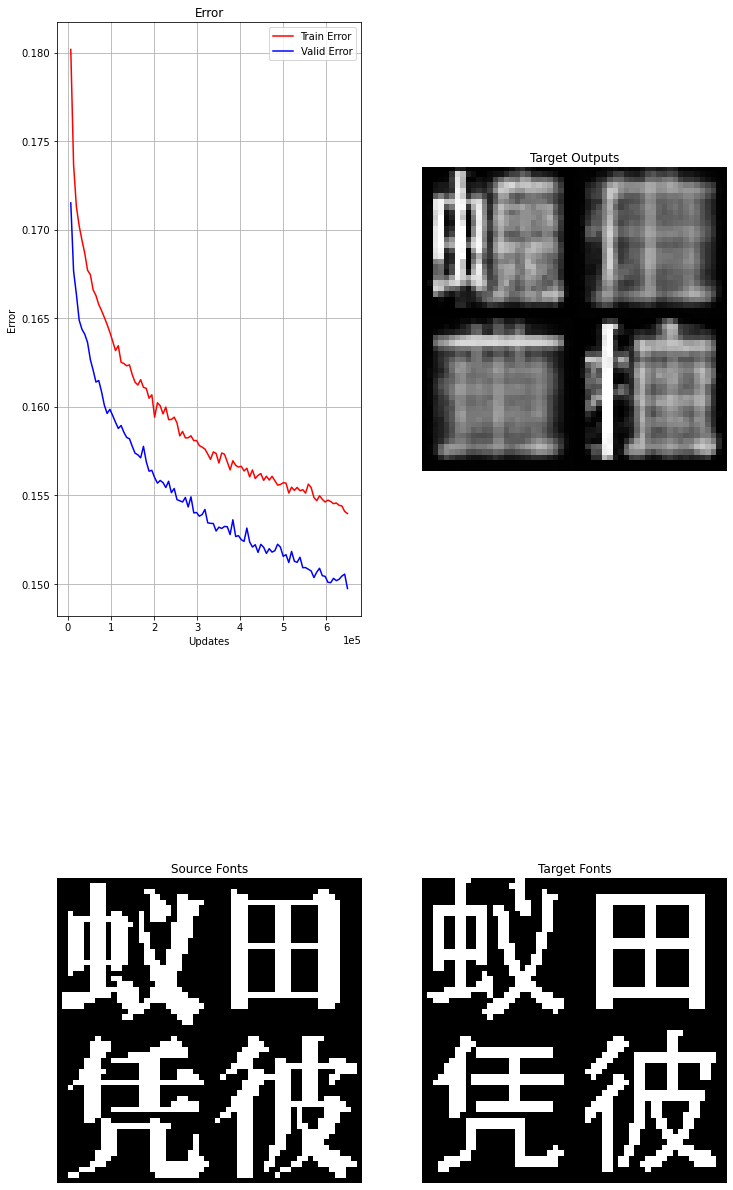

In [22]:
batch_size = 1
num_epochs = 100
num_samples_train = train_A.shape[0] # 3500
num_batches_train = num_samples_train // batch_size
# num_samples_valid = valid_A.shape[0] # 1000
# num_batches_valid = num_samples_valid // batch_size
updates = []

train_loss = []
valid_loss = []
cur_loss = 0
reset_default_graph()
plt.figure(figsize=(12, 24))

num_char_dim = 2


try:
    for epoch in range(num_epochs):
        #Forward->Backprob->Update params
        cur_loss = []
        for i in range(num_batches_train):
            idxs = np.random.choice(range(train_A.shape[0]), size=(batch_size), replace=False)    
            x_A_batch = train_A[idxs]
            x_B_batch = train_B[idxs]
            # setup what to fetch, notice l
            fetches_train = [train_op, loss, A_hat, l_z]
            feed_dict_train = {A: x_A_batch, B: x_B_batch}    # --------------------
            # do the complete backprob pass
            res_train = sess.run(fetches_train, feed_dict_train)
            _, batch_loss, train_out, train_z = tuple(res_train)
            cur_loss += [batch_loss]
        train_loss += [np.mean(cur_loss)]
        updates += [batch_size*num_batches_train*(epoch+1)] # batch_size*num_batches_train =num_samples_train

        # Evaluate     # train_op not used for optimizing!!!
        fetches_eval = [loss, A_hat, l_z]
        ##################### select the valid set #####################
        feed_dict_eval = {A: valid_A, B: valid_B}      # -----------------------
        res_valid = sess.run(fetches_eval, feed_dict_eval)       
        eval_loss, eval_out, eval_z = tuple(res_valid)
        valid_loss += [eval_loss]

        if epoch == 0:
            continue

        # Plotting
        plt.subplot(2,2,1)
        plt.cla() # clear the plot on the this(current) figure
        plt.title('Error')
        plt.xlabel('Updates'); plt.ylabel('Error')
        plt.plot(updates, train_loss, color="red")
        plt.plot(updates, valid_loss, color="blue")
        plt.legend(['Train Error', 'Valid Error'])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.grid('on')

        plt.subplot(2,2,2)
        plt.cla()
        plt.title("Target Outputs")
        plt.axis('off')
        idx = 0
        canvas = np.zeros((pt*num_char_dim, num_char_dim*pt))
        for i in range(num_char_dim):
            for j in range(num_char_dim):
                canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = eval_out[idx].reshape((pt, pt))
                idx += 1
        plt.imshow(canvas, cmap='gray')
        
        plt.subplot(2,2,3)
        plt.cla()
        plt.title("Source Fonts")
        plt.axis('off')
        idx = 0
        canvas = np.zeros((pt*num_char_dim, num_char_dim*pt))
        for i in range(num_char_dim):
            for j in range(num_char_dim):
                canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = valid_A[idx].reshape((pt, pt))
#                 canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = train_A[idx].reshape((pt, pt))
                idx += 1
        plt.imshow(canvas, cmap='gray')
                
        plt.subplot(2,2,4)
        plt.cla()
        plt.title("Target Fonts")
        plt.axis('off')
        idx = 0
        canvas = np.zeros((pt*num_char_dim, num_char_dim*pt))
        for i in range(num_char_dim):
            for j in range(num_char_dim):
                canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = valid_B[idx].reshape((pt, pt))
#                 canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = train_B[idx].reshape((pt, pt))
                idx += 1
        plt.imshow(canvas, cmap='gray')
        
        plt.savefig("output.png")
        display(Image(filename="output.png"))
        clear_output(wait=True)
except KeyboardInterrupt:
    pass

In [23]:
print(A_hat.shape)

(?, 784)


In [24]:
np.mean(np.square(train_A[0]-train_A[1]))

0.3647959183673469

### draft

In [17]:
img_array = np.array(res, dtype = np.uint8)
print(img_array.dtype.name)

print(font.getmask('H').getbbox())
print(font.font.getsize('H'))

pt = width = height = 1024
font = ImageFont.truetype("Arial.ttf", pt)
ascent, descent = font.getmetrics()
print(ascent,descent)
(font_width, font_height), (offset_x, offset_y) = font.font.getsize('A')
print(font.font.getsize("A"))
img = Image.new('L', (width, height),0)
print(width,height)
draw = ImageDraw.Draw(img)

draw.text((width/2-(font_width/2+offset_x),height/2-(font_height/2+offset_y)) ,"A", fill=255,font=font)

# draw.text(((width-font_width)/2-offset_x/2, (height-font_height)/2-offset_y/2-descent/2), "A", fill=255,font=font)
img.show()

NameError: name 'res' is not defined

In [ ]:
#plot a few  examples
plt.figure(figsize=(15, 25)) # (width, height)

idx = 0
canvas = np.zeros((pt*10, 10*pt))
for i in range(10):
    for j in range(10):
        canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = train_A[idx].reshape((pt, pt))
        idx += 1
plt.subplot(121).set_title('Songti characters')
plt.axis('off')
plt.imshow(canvas, cmap='gray')

idx = 0
canvas = np.zeros((pt*10, 10*pt))
for i in range(10):
    for j in range(10):
        canvas[i*pt:(i+1)*pt, j*pt:(j+1)*pt] = train_B[idx].reshape((pt, pt))
        idx += 1
plt.subplot(122).set_title('STHeiti Medium')
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.show()

In [ ]:

#     sentence_train = "汉体书写信息技术标准相容档案下载使用界面简单支援服务升级资讯专业制作如今社会已经不是那样了为什么不是那样了呢\
# 因为人太多了人这种自然原因也许带来了一些好处但是总的来说还是坏处多一点不知道跟谁学的现在也喜欢打空格而不喜欢打标点了也许不是什\
# 么大变化只是一点量的变化吧生活上算是发生了点变化吧我不敢说她来的及时但是至少是现在想要的也是满喜欢的其实其中有太多微妙的变化了\
# 对于我来说现实的是对钱的需要我这个人从来不习惯花的钱至少现在和以前是这样以后还不知道能撑多久也许我是狮子座的原因吧有很强的\
# 自尊心和强烈的占有欲最近偶尔感觉那种味道满能减少一个人的压力的也就是偶尔会去感觉下天下的男人都说它不好但是又有谁能离得了它呢\
# 我希望我能至少我会控制量我还是满有原则的人可是就是人太随和了也许是使生活上不愉快的源泉我真的想强硬的去对待一些我不喜欢的事情虽\
# 然已经有点改善了但是真的做到冷血真的对我来说好难我不会忘记那些虽然没什么大的或质上的改变但是真的是很难忘记的就像你心的一个角落\
# 虽然被清除了但是还是难以忘怀也许人吧一个有感情的人是做不到彻底忘记的何况是有过开心的日子有句歌词真的很喜"

#     sentence_valid = "创意空间快速无线上网人生总有太多不如意但是生活还是要继续面对大四一个人生表面上很快乐但是实际上是很难过的日子\
# 里我感觉到了它真正的含义有个别的同学去了喜欢的公司有同学考研有个同学像我现在真的很迷茫社会我没有去过当然一般人都不想去触碰它因\
# 为它真的不知道有多深就像数学的另一个领域在这个领域真熟悉那个领域你敢去吗但是我不是强人也没有能力不走进社会 现在与以前的不同社\
# 会与社会的不同真的很可怕把一个事物想的糟糕些还是有好处的我就是什么事情真的追求完美也不能说是完美吧但是真的喜欢那些什么都不管就\
# 过自己知道她们不用为别人着想生活的很洒脱我是多么向往那样的生活呀我也在努力尝试我会成功的我认为那是人生的最高境界至少对我是"